In [1]:
#Importing sqlite library for sql function
#Importing pandas library for python function
import sqlite3
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
#creating engine to run sqlite in python
eng= create_engine('sqlite://', echo=False)

In [3]:
#Importing canada car sales dataset
canada_car_sales_df = pd.read_csv('Canadasalesdata.csv')

#Converting dataset from dataframe to sql format
canada_car_sales_df.to_sql('canada_car_sales', eng, if_exists='replace', index=False)

### Cleaning and sorting data

In [4]:
#data information 
canada_car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model       236 non-null    object
 1   Jan         236 non-null    int64 
 2   Feb         236 non-null    int64 
 3   Mar         236 non-null    int64 
 4   Apr         236 non-null    int64 
 5   May         236 non-null    int64 
 6   Jun         236 non-null    int64 
 7   Jul         236 non-null    int64 
 8   Aug         236 non-null    int64 
 9   Sep         236 non-null    int64 
 10  Oct         236 non-null    int64 
 11  Nov         236 non-null    int64 
 12  Dec         236 non-null    int64 
 13  Sumofsales  236 non-null    int64 
 14  Category    236 non-null    object
 15  Year        236 non-null    int64 
dtypes: int64(14), object(2)
memory usage: 29.6+ KB


In [5]:
#Extracting car sales columns from the data
pd.read_sql_query("""SELECT *
                     FROM canada_car_sales
                     """, eng)

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Subaru Outback,499,621,948,1065,1079,981,1074,845,644,926,1184,1106,10972,MS,2019
232,Toyota 4Runner,605,393,784,762,854,681,824,903,522,690,663,549,8230,MS,2019
233,Toyota Highlander,729,792,1184,1095,1185,1423,1347,1336,1114,1366,1316,924,13811,MS,2019
234,Volkswagen Atlas,530,521,822,925,881,725,761,769,748,933,695,601,8911,MS,2019


In [6]:
#Checking for data in the year 2021
pd.read_sql_query("""SELECT model, Jun, Jul, Aug, Sep, Oct, Nov, Dec, Sumofsales, Year
                     FROM canada_car_sales
                     WHERE Year = 2021
                      """, eng)

,Model,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Year
0,Acura MDX,501,0,0,0,0,0,0,2926,2021
1,Audi Q7,303,0,0,0,0,0,0,1554,2021
2,Audi Q8,211,0,0,0,0,0,0,1031,2021
3,BMW X5,518,0,0,0,0,0,0,2544,2021
4,BMW X6,113,0,0,0,0,0,0,559,2021
...,...,...,...,...,...,...,...,...,...,...
65,Subaru Ascent,394,305,0,0,0,0,0,2031,2021
66,Subaru Outback,709,988,0,0,0,0,0,5992,2021
67,Toyota 4Runner,710,788,0,0,0,0,0,4896,2021
68,Toyota Highlander,2289,2070,0,0,0,0,0,12473,2021


In [7]:
#Checking for values in the month of July
pd.read_sql_query("""SELECT model, Jun, Jul, Aug, Sep, Oct, Nov, Dec, Sumofsales, Year
                     FROM canada_car_sales
                     WHERE Year = 2021
                     AND Jul != 0 """, eng)

,Model,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Year
0,Genesis GV80,168,121,0,0,0,0,0,963,2021
1,Lexus GX,21,14,0,0,0,0,0,175,2021
2,Lexus RX,944,923,0,0,0,0,0,5352,2021
3,Lexus NX,699,822,0,0,0,0,0,4441,2021
4,Lexus UX,360,337,0,0,0,0,0,1862,2021
5,Lexus LX,35,34,0,0,0,0,0,297,2021
6,Toyota Land Cruiser,30,43,0,0,0,0,0,196,2021
7,Toyota Sequoia,44,31,0,0,0,0,0,270,2021
8,Kia Sorento,1022,835,0,0,0,0,0,5971,2021
9,Kia Telluride,485,293,0,0,0,0,0,2824,2021


In [8]:
#Checking for values in the range of Aug till Dec
pd.read_sql_query("""SELECT model, Aug, Sep, Oct, Nov, Dec, Sumofsales, Year
                     FROM canada_car_sales
                     WHERE Year = 2021
                     AND (Aug != 0 OR Sep != 0 OR Oct != 0 OR Nov != 0 OR Dec != 0) """, eng)

,Model,Aug,Sep,Oct,Nov,Dec,Sumofsales,Year


In [9]:
#Omitting July - Dec 2021 values and hence updating Sumofsales to have consistent data
subt = canada_car_sales_df.apply(lambda row: row['Sumofsales'] - row['Jul'] if row['Year'] == 2021
                                 else row['Sumofsales'],axis = 1)
canada_car_sales_df['SalesuntilJun21'] = subt

In [10]:
#checking for the updated data
canada_car_sales_df

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year,SalesuntilJun21
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021,2926
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021,1554
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021,1031
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021,2544
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021,559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Subaru Outback,499,621,948,1065,1079,981,1074,845,644,926,1184,1106,10972,MS,2019,10972
232,Toyota 4Runner,605,393,784,762,854,681,824,903,522,690,663,549,8230,MS,2019,8230
233,Toyota Highlander,729,792,1184,1095,1185,1423,1347,1336,1114,1366,1316,924,13811,MS,2019,13811
234,Volkswagen Atlas,530,521,822,925,881,725,761,769,748,933,695,601,8911,MS,2019,8911


In [11]:
#checking for null values
canada_car_sales_df.isnull().sum()

Model              0
Jan                0
Feb                0
Mar                0
Apr                0
May                0
Jun                0
Jul                0
Aug                0
Sep                0
Oct                0
Nov                0
Dec                0
Sumofsales         0
Category           0
Year               0
SalesuntilJun21    0
dtype: int64

In [12]:
#converting dataframe to sql
canada_car_sales_df.to_sql('canada_car_sales', eng, if_exists='replace', index=False)

### Data Analysis

In [13]:
#Total car sales for each year
pd.read_sql_query("""SELECT Year,SUM (SalesuntilJun21)
                     FROM canada_car_sales
                     GROUP BY Year
                     ORDER BY Year """, eng)

,Year,SUM (SalesuntilJun21)
0,2019,390825
1,2020,341736
2,2021,128041


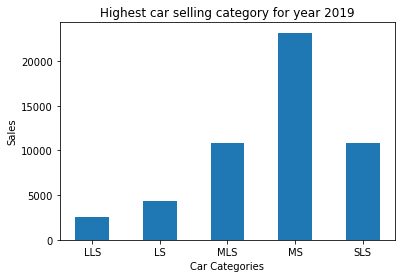

In [14]:
#Highest car selling category for year 2019
maxsales19 = pd.read_sql_query("""SELECT Year, Category, Model, MAX(SalesuntilJun21) MaxSales
                     FROM canada_car_sales
                     WHERE Year = 2019
                     GROUP BY Category
                     """, eng)
#Plotting bar graph
plt.bar(maxsales19.Category, maxsales19.MaxSales, tick_label = maxsales19.Category, width = 0.5)
plt.title("Highest car selling category for year 2019")
plt.xlabel('Car Categories')
plt.ylabel('Sales')
plt.show()

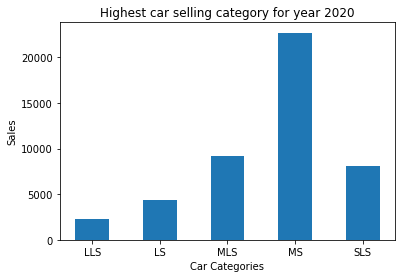

In [15]:
#Highest car selling category for year 2020
maxsales20 = pd.read_sql_query("""SELECT Year, Category, Model, MAX(SalesuntilJun21) MaxSales
                     FROM canada_car_sales
                     WHERE Year = 2020
                     GROUP BY Category
                     """, eng)
#Plotting bar graph
plt.bar(maxsales20.Category, maxsales20.MaxSales, tick_label = maxsales20.Category, width = 0.5)
plt.title("Highest car selling category for year 2020")
plt.xlabel('Car Categories')
plt.ylabel('Sales')
plt.show()

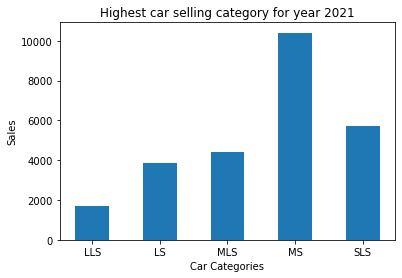

In [16]:
#Highest car selling category for year 2021
maxsales21 = pd.read_sql_query("""SELECT Year, Category, Model, MAX(SalesuntilJun21) MaxSales
                     FROM canada_car_sales
                     WHERE Year = 2021
                     GROUP BY Category
                     """, eng)
#Plotting bar graph
plt.bar(maxsales21.Category, maxsales21.MaxSales, tick_label = maxsales21.Category, width = 0.5)
plt.title("Highest car selling category for year 2021")
plt.xlabel('Car Categories')
plt.ylabel('Sales')
plt.show()

In [17]:
#Summary of Highest car selling model and category for each year
pd.read_sql_query("""SELECT Year, Category, Model, MAX (SalesuntilJun21) MaxSales
                     FROM canada_car_sales
                     GROUP BY Year
                     ORDER BY Year """, eng)

,Year,Category,Model,MaxSales
0,2019,MS,Jeep Wrangler,23185
1,2020,MS,Jeep Wrangler,22707
2,2021,MS,Toyota Highlander,10403


In [18]:
#Lowest car selling model and category for each year
pd.read_sql_query("""SELECT Year, Category, Model, MIN (SalesuntilJun21) MinSales
                     FROM canada_car_sales
                     GROUP BY Year
                     ORDER BY Year """, eng)

,Year,Category,Model,MinSales
0,2019,MS,Volkswagen Touareg,26
1,2020,MS,Volkswagen Touareg,2
2,2021,LS,Jeep Grand Wagoneer,4


In [19]:
#Maximum Sales for each year in different categories
pd.read_sql_query("""SELECT Year, Category, Model, MAX(SalesuntilJun21) MaxSales
                     FROM canada_car_sales
                     GROUP BY Category, Year
                     ORDER BY Year, MaxSales""", eng)

,Year,Category,Model,MaxSales
0,2019,LLS,Cadillac Escalade,2515
1,2019,LS,Ford Expedition,4381
2,2019,MLS,Mercedes0Benz GLC/GLK0Class,10883
3,2019,SLS,Mercedes0Benz GLC/GLK0Class,10883
4,2019,MS,Jeep Wrangler,23185
5,2020,LLS,Mercedes0Benz GL/GLS0Class,2256
6,2020,LS,Ford Expedition,4408
7,2020,SLS,Audi Q5,8048
8,2020,MLS,Lexus RX,9228
9,2020,MS,Jeep Wrangler,22707
